# Microsoft Movie Analysis

_Author: Valentina Valdez_

![picture of motion picture camera](Images/pexels-donald-tong-66134.jpg)

## 1.0 Business Understanding

### 1.1 Company Vision & High Level Goals

Microsoft's decision to venture into the movie industry marks an exciting strategic shift. By telling compelling stories through film, Microsoft can connect with audiences on an emotional level and establish a stronger presence in popular culture, leading to increased brand awareness. 

Other tech companies, such as Apple and Amazon, have succesfully transitioned into the entertainment industry. By leveraging its extensive technological expertise, vast resources, and global reach, Microsoft can produce high-quality movies that will enhance its brand image and increase its cultural influence.

This research seeks to use the available data to gain valuable insights into trends and consumption patterns, enabling the company to create tailored content that resonates with viewers and maximizes box office success. Within this notebook, I will explore what types of films Microsoft should make to maximize profitability and create positive brand exposure by producing critically acclaimed films. 

### 1.2 Film Industry Background

The period that this analysis will focus on starts from the New Hollywood Era. The New Hollywood era, spanning the late 1960s to the 1970s, was marked by auteur-driven filmmaking. High recognizable directors like Francis Ford Coppola, Martin Scorsese, and Steven Spielberg emerged during this time period and are still relevant today. The era produced groundbreaking films like "The Godfather," "Taxi Driver," and "Jaws," which not only achieved critical acclaim but also achieved significant commercial success.

In the 1980s and 1990s, the blockbuster era took hold, with studios increasingly focusing on  films designed to attract large audiences and generate substantial profits. Directors like James Cameron and Steven Spielberg emerged and became synonymous with blockbuster filmmaking. "Titanic", which was directed by James Cameron, became the first billion dollar movie. It also won multiple awards, including an Oscar for Best Picture. 

In the 21st century, franchises, established intellectial properties (IPs), and cinematic universes are prevalent. Recognizable IPs such as Marvel and Star Wars series domanite the box office, attracting massive audiences and generating billions of dollars in revenue. Other IPs, such as Lego, Barbie, and Nintendo, have also plunged into filmmaking and have seen great success. These blockbusters often combine action, visual effects, and interconnected storytelling to create immersive cinematic experiences. However, strong independent voices in non-franchise cinema exist, with the likes of filmmakers like Quentin Tarantino and Wes Anderson. Prestige film awards, such as the Academy Awards, the Golden Globes, and the Cannes Film Festival, are also highly regarded in the industry and in popular culture.  


### 1.3 Research Goals

Given the above goals and industry background, this analysis will focus on the following topics:
- Limit analysis to films released between 1969 and 2019.
- Investigate the types of films that produce high ROIs. 
- Find directors with experience creating either high ROI, high prestige films, or both. 

Let's dive in!

## 2.0 Data Understanding

This analysis uses a variety of trusted data sources. The datasets will be used to narrow down how Microsoft should  invest in its filmaking efforts. The sources are as follows:

- **IMDB:** Launched in 1990 - and owned by Amazon since 1998 - IMDB is one of the most popular and recognizable databases. This database houses a large amount of information such as directors, writers, genres, and release date.  
- **The Numbers:** This database was started in 1997, and is now the largest freely available database of movie business information. The available data contains information about movie titles, production budgets, and gross revenue data. 
- **The Academy Awards**: This data was created by scraping the <a href="https://awardsdatabase.oscars.org/">academy database</a> for a Kaggle competition. The Academy Awards is considered the most prestigious filmaking award in America, and this data will provide valuable insights in identifying individuals capable of making prestige films. This dataset contains information on Academy Award nominees and winners between the years 1927 and 2023. Access the data <a href="https://www.kaggle.com/datasets/unanimad/the-oscar-award">here</a> .  


This analysis is limited by the information in these datasets, and may not fully encompass the full scope of the filmaking industry. However, the data is current enough that this analysis can still provide valuable insight and guide Microsoft on their next steps.


The first step in this analysis is to understand the data and how we can transform it to gleam insights. First, I am importing the necessary libraries to read the data and perform the necessary analysis. I will review the data sources one by one to determine what needs to be done before we can perform analysis. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import datetime

%matplotlib inline

# changing pandas formatting to avoid scientific notation
pd.options.display.float_format = '{:.2f}'.format

### 2.1 IMDB

Let's examine IMDB's database first, which is the most extensive of the three. I will need information on movies titles, their genres, and the directors per film. 

In [2]:
#Connect to database

conn = sqlite3.connect("Data/im.db")

#Review tables
imdb_tables = pd.read_sql("""SELECT name FROM sqlite_master;""", conn)
imdb_tables

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [3]:
#Query tables 
movie_basics = pd.read_sql("""SELECT * FROM movie_basics;""", conn)
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"


In [4]:
#Review data structure
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [5]:
movie_akas = pd.read_sql("""

SELECT * 
FROM movie_akas
WHERE region IS 'US'
AND (language IS 'en' OR language IS NULL)

;""", conn)
movie_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51465 entries, 0 to 51464
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           51465 non-null  object 
 1   ordering           51465 non-null  int64  
 2   title              51465 non-null  object 
 3   region             51465 non-null  object 
 4   language           523 non-null    object 
 5   types              6689 non-null   object 
 6   attributes         2450 non-null   object 
 7   is_original_title  51460 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 3.1+ MB


In [6]:
movie_akas['language'].unique()

array([None, 'en'], dtype=object)

Based on these initial queries, I will need to connect the additional tables to add the directors per film.

### 2.2 The Numbers

For this dataset, the goal is to calculate the Return on Investment per film. Additionally, films will be categorized by budget so that the budget can be discribed as low, mid, or high. Eventually, I can tie this information to the IMDB table and identify which films and directors have produced high ROIs. 

In [7]:
#Import data
numbers_df = pd.read_csv('Data/tn.movie_budgets.csv.gz')

#Preview table
numbers_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [8]:
#Review data structure
numbers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


The initial assessment is that this data will need to be converted in the following ways:

- The budget and gross data columns need to be converted to integers. 
- The release_date column needs to be coverted to datetime object.
- There are no null values, but I will need to further examine to make sure that the values are valid .

### 2.3 The Academy Awards

This dataset will be critical in providing information on which films and directors have been critically accalimed. 

In [9]:
#Import Data
oscars_df = pd.read_csv('Data/the_oscar_award.csv')

#Preview Data
oscars_df.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False


In [10]:
#Review data structure 
oscars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10765 entries, 0 to 10764
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year_film      10765 non-null  int64 
 1   year_ceremony  10765 non-null  int64 
 2   ceremony       10765 non-null  int64 
 3   category       10765 non-null  object
 4   name           10761 non-null  object
 5   film           10450 non-null  object
 6   winner         10765 non-null  bool  
dtypes: bool(1), int64(3), object(3)
memory usage: 515.2+ KB


Based on this preliminary review, I will need to do the following:
- Make sure that the name column belongs to only people.
- Find out the missing data from films
- Filter by relevant categories - in this analysis, we will only look at films that won were either nominated or won  in recognizable categories like Best Picture, etc. 

## 3.0 Data Preparation

Now that we have a good understanding of our data, the next step is to clean the datasets and engineer some features.

### 3.1 IMDB

#### 3.1.1 Movie Genres

For the IMDB dataset, I will need the film name, release year, director, and genre. I will also filter films made prior to 1969 and any foreign language films. 

In [62]:
#Query relevant tables and preview data

movies_data = pd.read_sql(
"""
SELECT primary_title AS movie, 
       start_year AS release_year, 
       genres,
       primary_name AS director,
       primary_title || start_year AS m_id,
       CASE
           WHEN death_year IS NULL THEN 1
           ELSE 0
        END AS current
  FROM movie_basics
      JOIN directors 
           USING(movie_id)
      JOIN persons
           USING(person_id)
  WHERE start_year BETWEEN 1969 AND 2019
    AND movie_id IN (SELECT movie_id
                     FROM movie_akas
                     WHERE region IS 'US'
                     AND (language = 'en' OR language IS NULL)
);""", conn)

#Preview results
movies_data.head()

,movie,release_year,genres,director,m_id,current
0,The Other Side of the Wind,2018,Drama,Orson Welles,The Other Side of the Wind2018,0
1,The Other Side of the Wind,2018,Drama,Orson Welles,The Other Side of the Wind2018,0
2,Bigfoot,2017,"Horror,Thriller",Mc Jones,Bigfoot2017,1
3,Cooper and Hemingway: The True Gen,2013,Documentary,John Mulholland,Cooper and Hemingway: The True Gen2013,1
4,Heaven & Hell,2018,Drama,Stuart Paul,Heaven & Hell2018,1


In [63]:
#Review DataFrame structure
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107173 entries, 0 to 107172
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   movie         107173 non-null  object
 1   release_year  107173 non-null  int64 
 2   genres        106423 non-null  object
 3   director      107173 non-null  object
 4   m_id          107173 non-null  object
 5   current       107173 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 4.9+ MB


In [64]:
#Check for duplicates
duplicates = movies_data[movies_data.duplicated()]
print(len(duplicates))
duplicates.head()

52917


,movie,release_year,genres,director,m_id,current
1,The Other Side of the Wind,2018,Drama,Orson Welles,The Other Side of the Wind2018,0
6,The Final Journey,2010,Drama,R.J. Adams,The Final Journey2010,0
7,The Final Journey,2010,Drama,R.J. Adams,The Final Journey2010,0
9,Foodfight!,2012,"Action,Animation,Comedy",Lawrence Kasanoff,Foodfight!2012,1
10,Foodfight!,2012,"Action,Animation,Comedy",Lawrence Kasanoff,Foodfight!2012,1


In [65]:
# Remove Duplicates
movies_data.drop_duplicates(inplace=True)

#Check number of records
print(len(movies_data))

#Review results
movies_data.head()

54256


,movie,release_year,genres,director,m_id,current
0,The Other Side of the Wind,2018,Drama,Orson Welles,The Other Side of the Wind2018,0
2,Bigfoot,2017,"Horror,Thriller",Mc Jones,Bigfoot2017,1
3,Cooper and Hemingway: The True Gen,2013,Documentary,John Mulholland,Cooper and Hemingway: The True Gen2013,1
4,Heaven & Hell,2018,Drama,Stuart Paul,Heaven & Hell2018,1
5,The Final Journey,2010,Drama,R.J. Adams,The Final Journey2010,0


In [66]:
#Check for extraneous values
for col in movies_data.columns:
    print(col, '\n', movies_data[col].value_counts(normalize=True).head(), '\n')

movie 
 World of Death               0.00
Venice 70: Future Reloaded   0.00
Our RoboCop Remake           0.00
Our Footloose Remake         0.00
Grindsploitation             0.00
Name: movie, dtype: float64 

release_year 
 2016   0.13
2014   0.12
2013   0.12
2015   0.12
2017   0.11
Name: release_year, dtype: float64 

genres 
 Documentary    0.17
Drama          0.11
Comedy         0.06
Horror         0.05
Comedy,Drama   0.03
Name: genres, dtype: float64 

director 
 Larry Rosen       0.00
Charlie Minn      0.00
Dustin Ferguson   0.00
Philip Gardiner   0.00
James Franco      0.00
Name: director, dtype: float64 

m_id 
 World of Death2016               0.00
Venice 70: Future Reloaded2013   0.00
Our RoboCop Remake2014           0.00
Our Footloose Remake2011         0.00
Grindsploitation2016             0.00
Name: m_id, dtype: float64 

current 
 1   1.00
0   0.00
Name: current, dtype: float64 



In [69]:
#Print results from data cleaning
print(f" This table has {len(movies_data)} entries. \
Each entry represents a film, its release date, genres, and director.")

 This table has 54256 entries. Each entry represents a film, its release date, genres, and director.


In [68]:
#Add movie id column so that it can be matched with other tables
movies_data

,movie,release_year,genres,director,m_id,current
0,The Other Side of the Wind,2018,Drama,Orson Welles,The Other Side of the Wind2018,0
2,Bigfoot,2017,"Horror,Thriller",Mc Jones,Bigfoot2017,1
3,Cooper and Hemingway: The True Gen,2013,Documentary,John Mulholland,Cooper and Hemingway: The True Gen2013,1
4,Heaven & Hell,2018,Drama,Stuart Paul,Heaven & Hell2018,1
5,The Final Journey,2010,Drama,R.J. Adams,The Final Journey2010,0
...,...,...,...,...,...,...
107165,Monkey King Reloaded,2017,Adventure,Felix Ip,Monkey King Reloaded2017,1
107166,End of the Century,2019,Drama,Lucio Castro,End of the Century2019,1
107167,The House Elf,2019,"Comedy,Family,Fantasy",Evgeniy Bedarev,The House Elf2019,1
107168,Chasing Happiness,2019,Documentary,John Taylor,Chasing Happiness2019,1


### 3.2 The Numbers

Next step is to clean and create features for the numbers dataset. From here, we want to find net profits and ROI. In addition to that, each film will be categorized by the size of their budget. 

In [17]:
#Check for duplicates
duplicates = numbers_df[numbers_df.duplicated()]
print(len(duplicates))

0


In [18]:
#Check for extraneous values
for col in numbers_df.columns:
    print(col, '\n', numbers_df[col].value_counts(normalize=True).head(), '\n\n')

id 
 4    0.01
53   0.01
61   0.01
65   0.01
69   0.01
Name: id, dtype: float64 


release_date 
 Dec 31, 2014   0.00
Dec 31, 2015   0.00
Dec 31, 2010   0.00
Dec 31, 2008   0.00
Dec 31, 2012   0.00
Name: release_date, dtype: float64 


movie 
 Home               0.00
King Kong          0.00
Halloween          0.00
Robin Hood         0.00
Dawn of the Dead   0.00
Name: movie, dtype: float64 


production_budget 
 $20,000,000   0.04
$10,000,000   0.04
$30,000,000   0.03
$15,000,000   0.03
$25,000,000   0.03
Name: production_budget, dtype: float64 


domestic_gross 
 $0            0.09
$8,000,000    0.00
$2,000,000    0.00
$7,000,000    0.00
$10,000,000   0.00
Name: domestic_gross, dtype: float64 


worldwide_gross 
 $0            0.06
$8,000,000    0.00
$2,000,000    0.00
$7,000,000    0.00
$11,000,000   0.00
Name: worldwide_gross, dtype: float64 




Unfortunately, this dataset contains some movies that do not have reported worldwide gross numbers. These will be dropped, but first, I will convert the columns to their appropiate data type. 

In [19]:
#Converting release_date column to datetime object
numbers_df['release_date'] = pd.to_datetime(numbers_df['release_date'])

#Filter results to movies released after 1969 - start of the New Hollywood Era 
numbers_df = numbers_df.loc[numbers_df['release_date'] >= '1969']


#Review results
numbers_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [20]:
#Convert 'production_budget', 'domestic_gross', 'worldwide_gross' to integers

#Remove extra symbols from strings
cols = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in cols:
    numbers_df[col] = numbers_df[col].str.replace('$','').str.replace(',','')
numbers_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [21]:
#Convert columns to integers
cols = ['production_budget', 'domestic_gross', 'worldwide_gross']
numbers_df[cols] = numbers_df[cols].apply(pd.to_numeric, axis=1)

#Review results
numbers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5632 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5632 non-null   int64         
 1   release_date       5632 non-null   datetime64[ns]
 2   movie              5632 non-null   object        
 3   production_budget  5632 non-null   int64         
 4   domestic_gross     5632 non-null   int64         
 5   worldwide_gross    5632 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 308.0+ KB


In [22]:
#Drop rows where worldwide_gross is 0. 
numbers_df = numbers_df.loc[numbers_df['worldwide_gross'] > 0]

Now that the data is clean, we can create the 'ROI' (Return on Investment) column with the following formula:

$$
ROI = \frac{Net Gross}{Production Budget} * 100
$$

In [23]:
#Add Net Profit Column
numbers_df['net_profit'] = (numbers_df['worldwide_gross'] - numbers_df['production_budget']).round(-3)

#Add ROI Column
numbers_df['ROI'] = (numbers_df['net_profit'] / numbers_df['production_budget'] * 100).round(-1)

#Check results
numbers_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit,ROI
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345000,550.00
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635064000,150.00
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200238000,-60.00
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072414000,320.00
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999722000,320.00


In [24]:
#Add new column "Year" as integer
numbers_df['release_year'] = pd.DatetimeIndex(numbers_df['release_date']).year

#Check results
numbers_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit,ROI,release_year
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345000,550.00,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635064000,150.00,2011
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200238000,-60.00,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072414000,320.00,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999722000,320.00,2017


In [25]:
#Budget ranking - first, define function

def budget_ranking(budget):
    if budget < 500000:
        return "low"
    elif budget > 50000000:
        return "high"
    else:
        return "mid"

In [26]:
#Create new column and apply function

numbers_df['budget_level'] = numbers_df['production_budget'].apply(budget_ranking)
numbers_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit,ROI,release_year,budget_level
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345000,550.00,2009,high
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635064000,150.00,2011,high
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200238000,-60.00,2019,high
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072414000,320.00,2015,high
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999722000,320.00,2017,high


In [55]:
#Isolate release year
numbers_df['release_year'] = numbers_df['release_date'].dt.year

#Create new column for identifying movies based on title and year
numbers_df['m_id'] = numbers_df['movie'] + numbers_df['release_year'].astype(str)

numbers_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit,ROI,release_year,budget_level,m_id
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345000,550.00,2009,high,Avatar2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635064000,150.00,2011,high,Pirates of the Caribbean: On Stranger Tides2011
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200238000,-60.00,2019,high,Dark Phoenix2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072414000,320.00,2015,high,Avengers: Age of Ultron2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999722000,320.00,2017,high,Star Wars Ep. VIII: The Last Jedi2017


### 3.3 The Academy Awards

In [27]:
#Filtering for films made between 1969 and 2019

oscars_df = oscars_df.loc[(oscars_df['year_film'] >= 1969) & (oscars_df['year_film'] <= 2019)]
print("Min year: ", oscars_df['year_film'].min())
print("Max year: ", oscars_df['year_film'].max())


Min year:  1969
Max year:  2019


In [28]:
#Check for duplicates
duplicates = oscars_df[oscars_df.duplicated()]
print(len(duplicates))

6


In [29]:
#Review duplicates list
duplicates

,year_film,year_ceremony,ceremony,category,name,film,winner
6220,1983,1984,56,MUSIC (Original Song),Music by Michel Legrand; Lyric by Alan Bergman...,Yentl,False
7068,1991,1992,64,MUSIC (Original Song),Music by Alan Menken; Lyric by Howard Ashman,Beauty and the Beast,False
7395,1994,1995,67,MUSIC (Original Song),Music by Elton John; Lyric by Tim Rice,The Lion King,False
8864,2007,2008,80,MUSIC (Original Song),Music by Alan Menken; Lyric by Stephen Schwartz,Enchanted,False
8865,2007,2008,80,MUSIC (Original Song),Music by Alan Menken; Lyric by Stephen Schwartz,Enchanted,False
9091,2009,2010,82,MUSIC (Original Song),Music and Lyric by Randy Newman,The Princess and the Frog,False


In [30]:
#Check for extraneous values
for col in oscars_df.columns:
    print(col, '\n', oscars_df[col].value_counts(normalize=True).head(), '\n\n')

year_film 
 2019   0.02
2017   0.02
2013   0.02
2016   0.02
2012   0.02
Name: year_film, dtype: float64 


year_ceremony 
 2020   0.02
2018   0.02
2013   0.02
2017   0.02
2014   0.02
Name: year_ceremony, dtype: float64 


ceremony 
 92   0.02
90   0.02
85   0.02
89   0.02
86   0.02
Name: ceremony, dtype: float64 


category 
 BEST PICTURE                 0.05
ACTOR IN A SUPPORTING ROLE   0.04
FILM EDITING                 0.04
COSTUME DESIGN               0.04
DOCUMENTARY (Feature)        0.04
Name: category, dtype: float64 


name 
 John Williams   0.01
France          0.00
Meryl Streep    0.00
Woody Allen     0.00
Italy           0.00
Name: name, dtype: float64 


film 
 Titanic               0.00
La La Land            0.00
Shakespeare in Love   0.00
Forrest Gump          0.00
Chicago               0.00
Name: film, dtype: float64 


winner 
 False   0.77
True    0.23
Name: winner, dtype: float64 




Some winners seem to be countries. This is an issue of who wins the award. For this analysis, we will only be looking at best actress, best actor, best director, and best picture awards. 

In [31]:
#Filter by award data types
oscars_df['category'].unique()

array(['ACTOR', 'ACTOR IN A SUPPORTING ROLE', 'ACTRESS',
       'ACTRESS IN A SUPPORTING ROLE', 'ART DIRECTION', 'CINEMATOGRAPHY',
       'COSTUME DESIGN', 'DIRECTING', 'DOCUMENTARY (Feature)',
       'DOCUMENTARY (Short Subject)', 'FILM EDITING',
       'FOREIGN LANGUAGE FILM',
       'MUSIC (Original Score--for a motion picture [not a musical])',
       'MUSIC (Score of a Musical Picture--original or adaptation)',
       'MUSIC (Song--Original for the Picture)', 'BEST PICTURE',
       'SHORT SUBJECT (Cartoon)', 'SHORT SUBJECT (Live Action)', 'SOUND',
       'SPECIAL VISUAL EFFECTS',
       'WRITING (Screenplay--based on material from another medium)',
       'WRITING (Story and Screenplay--based on material not previously published or produced)',
       'JEAN HERSHOLT HUMANITARIAN AWARD', 'HONORARY AWARD',
       'MUSIC (Original Score)', 'MUSIC (Original Song Score)',
       'WRITING (Story and Screenplay--based on factual material or material not previously published or produced)',

In [32]:
#Remove non-relevent awards
oscars_df = oscars_df[(oscars_df['category'].str.contains('act|directing|picture', case=False)) & \
                      (~oscars_df['category'].str.contains('writing|music|short', case=False))]
oscars_df['category'].unique()

array(['ACTOR', 'ACTOR IN A SUPPORTING ROLE', 'ACTRESS',
       'ACTRESS IN A SUPPORTING ROLE', 'DIRECTING', 'BEST PICTURE',
       'ACTOR IN A LEADING ROLE', 'ACTRESS IN A LEADING ROLE'],
      dtype=object)

In [33]:
#Recheck table
oscars_df.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
4668,1969,1970,42,ACTOR,Richard Burton,Anne of the Thousand Days,False
4669,1969,1970,42,ACTOR,Dustin Hoffman,Midnight Cowboy,False
4670,1969,1970,42,ACTOR,Peter O'Toole,"Goodbye, Mr. Chips",False
4671,1969,1970,42,ACTOR,Jon Voight,Midnight Cowboy,False
4672,1969,1970,42,ACTOR,John Wayne,True Grit,True


In [34]:
oscars_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1573 entries, 4668 to 10350
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year_film      1573 non-null   int64 
 1   year_ceremony  1573 non-null   int64 
 2   ceremony       1573 non-null   int64 
 3   category       1573 non-null   object
 4   name           1573 non-null   object
 5   film           1573 non-null   object
 6   winner         1573 non-null   bool  
dtypes: bool(1), int64(3), object(3)
memory usage: 87.6+ KB


In [35]:
#Separate best picture awards
picture_awards = oscars_df[(oscars_df['category'].str.contains('picture', case=False)) &
                           (~oscars_df['category'].str.contains('directing', case=False))]

picture_awards.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
4743,1969,1970,42,BEST PICTURE,"Hal B. Wallis, Producer",Anne of the Thousand Days,False
4744,1969,1970,42,BEST PICTURE,"John Foreman, Producer",Butch Cassidy and the Sundance Kid,False
4745,1969,1970,42,BEST PICTURE,"Ernest Lehman, Producer","Hello, Dolly!",False
4746,1969,1970,42,BEST PICTURE,"Jerome Hellman, Producer",Midnight Cowboy,True
4747,1969,1970,42,BEST PICTURE,"Jacques Perrin and Hamed Rachedi, Producers",Z,False


In [36]:
picture_awards.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 4743 to 10350
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year_film      298 non-null    int64 
 1   year_ceremony  298 non-null    int64 
 2   ceremony       298 non-null    int64 
 3   category       298 non-null    object
 4   name           298 non-null    object
 5   film           298 non-null    object
 6   winner         298 non-null    bool  
dtypes: bool(1), int64(3), object(3)
memory usage: 16.6+ KB


In [37]:
cols = ['category', 'name']
for col in cols:
    print(col, '\n', picture_awards[col].value_counts(normalize=True).head(10), '\n\n')

category 
 BEST PICTURE   1.00
Name: category, dtype: float64 


name 
 Irwin Winkler and Robert Chartoff, Producers       0.01
Lawrence Bender, Producer                          0.01
Steven Spielberg and Kathleen Kennedy, Producers   0.01
Jerome Hellman, Producer                           0.01
James L. Brooks, Producer                          0.01
David Puttnam, Producer                            0.01
Warren Beatty, Producer                            0.01
Emma Thomas and Christopher Nolan, Producers       0.01
John Boorman, Producer                             0.01
John Foreman, Producer                             0.01
Name: name, dtype: float64 




In [38]:
#Isolate directors
director_awards = oscars_df[(~oscars_df['category'].str.contains('picture', case=False)) &
                           (oscars_df['category'].str.contains('directing', case=False))]
cols = ['category', 'name']
for col in cols:
    print(col, '\n', director_awards[col].value_counts(normalize=True).head(10), '\n\n')

category 
 DIRECTING   1.00
Name: category, dtype: float64 


name 
 Martin Scorsese        0.04
Woody Allen            0.03
Steven Spielberg       0.03
Robert Altman          0.02
Peter Weir             0.02
Clint Eastwood         0.02
Sidney Lumet           0.01
Ridley Scott           0.01
Francis Ford Coppola   0.01
Ingmar Bergman         0.01
Name: name, dtype: float64 




## 4.0 Exploratory Data Analysis

### 4.1 Does budget correlate to profits?

First, lets examine what correlation between ROI and worldwide gross profit.

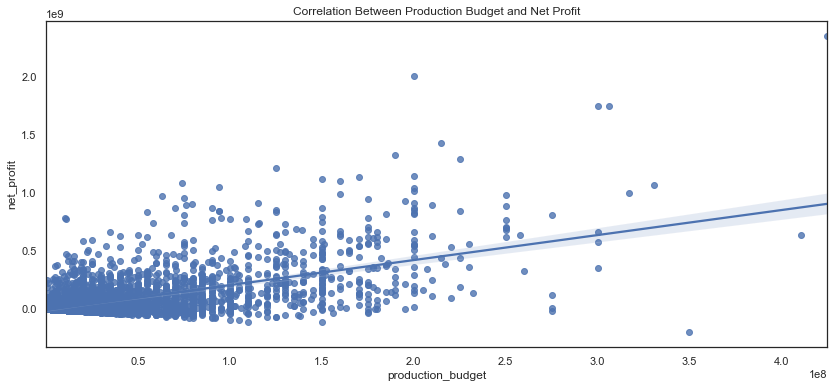

In [121]:
# Set the width and height
plt.figure(figsize=(14,6))

#Add title
plt.title('Correlation Between Production Budget and Net Profit')

#Create plot
ax1 = sns.regplot(x=numbers_df['production_budget'],y=numbers_df['net_profit']);

From the graph above, we can observe a modest positive correlation betweem budget and net profit. 

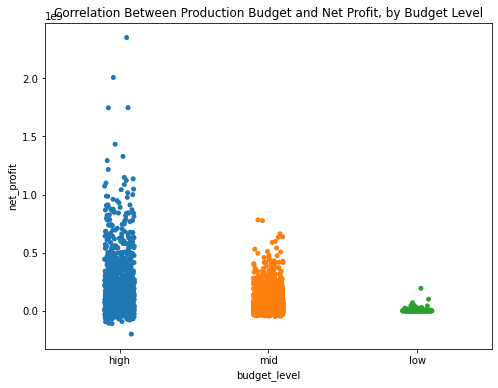

In [40]:
# Set the width and height
plt.figure(figsize=(8,6))

#Add title
plt.title('Correlation Between Production Budget and Net Profit, by Budget Level')

#Create plot
sns.stripplot(x=numbers_df['budget_level'],y=numbers_df['net_profit']);

While low budget movies can certainly be profitable, mid and high budgets have a better chance of earning much higher profits. 

## 4.2 Pick directors for every budget

We would like to properly staff these movies. Lets find current directors with good success records across different budget levels. 

In [70]:
movies_data

,movie,release_year,genres,director,m_id,current
0,The Other Side of the Wind,2018,Drama,Orson Welles,The Other Side of the Wind2018,0
2,Bigfoot,2017,"Horror,Thriller",Mc Jones,Bigfoot2017,1
3,Cooper and Hemingway: The True Gen,2013,Documentary,John Mulholland,Cooper and Hemingway: The True Gen2013,1
4,Heaven & Hell,2018,Drama,Stuart Paul,Heaven & Hell2018,1
5,The Final Journey,2010,Drama,R.J. Adams,The Final Journey2010,0
...,...,...,...,...,...,...
107165,Monkey King Reloaded,2017,Adventure,Felix Ip,Monkey King Reloaded2017,1
107166,End of the Century,2019,Drama,Lucio Castro,End of the Century2019,1
107167,The House Elf,2019,"Comedy,Family,Fantasy",Evgeniy Bedarev,The House Elf2019,1
107168,Chasing Happiness,2019,Documentary,John Taylor,Chasing Happiness2019,1


In [73]:
#Make list of current directors by dropping those with directors with 'death_year' values
current_directors = movies_data[movies_data['current'] == 1]

#Review data
current_directors

,movie,release_year,genres,director,m_id,current
2,Bigfoot,2017,"Horror,Thriller",Mc Jones,Bigfoot2017,1
3,Cooper and Hemingway: The True Gen,2013,Documentary,John Mulholland,Cooper and Hemingway: The True Gen2013,1
4,Heaven & Hell,2018,Drama,Stuart Paul,Heaven & Hell2018,1
8,Foodfight!,2012,"Action,Animation,Comedy",Lawrence Kasanoff,Foodfight!2012,1
13,Return to Babylon,2013,"Biography,Comedy,Drama",Alex Monty Canawati,Return to Babylon2013,1
...,...,...,...,...,...,...
107165,Monkey King Reloaded,2017,Adventure,Felix Ip,Monkey King Reloaded2017,1
107166,End of the Century,2019,Drama,Lucio Castro,End of the Century2019,1
107167,The House Elf,2019,"Comedy,Family,Fantasy",Evgeniy Bedarev,The House Elf2019,1
107168,Chasing Happiness,2019,Documentary,John Taylor,Chasing Happiness2019,1


In [82]:
#Add financial data to table
directors_budget = current_directors.merge(numbers_df, how='inner', \
                                           left_on=['m_id','movie','release_year'],\
                                          right_on=['m_id','movie','release_year'])

#Remove low budget films
directors_budget = directors_budget[~directors_budget['budget_level'].str.contains('low')]

#Review results
directors_budget.head()

,movie,release_year,genres,director,m_id,current,id,release_date,production_budget,domestic_gross,worldwide_gross,net_profit,ROI,budget_level
0,Foodfight!,2012,"Action,Animation,Comedy",Lawrence Kasanoff,Foodfight!2012,1,26,2012-12-31,45000000,0,73706,-44926000,-100.00,mid
1,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",Ben Stiller,The Secret Life of Walter Mitty2013,1,37,2013-12-25,91000000,58236838,187861183,96861000,110.00,high
2,A Walk Among the Tombstones,2014,"Action,Crime,Drama",Scott Frank,A Walk Among the Tombstones2014,1,67,2014-09-19,28000000,26017685,62108587,34109000,120.00,mid
3,Jurassic World,2015,"Action,Adventure,Sci-Fi",Colin Trevorrow,Jurassic World2015,1,34,2015-06-12,215000000,652270625,1648854864,1433855000,670.00,high
4,The Rum Diary,2011,"Comedy,Drama",Bruce Robinson,The Rum Diary2011,1,16,2011-10-28,45000000,13109815,21544732,-23455000,-50.00,mid


In [107]:
#Sort
directors_budget.sort_values('net_profit', ascending=False).head()

,movie,release_year,genres,director,m_id,current,id,release_date,production_budget,domestic_gross,worldwide_gross,net_profit,ROI,budget_level
1180,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",Joe Russo,Avengers: Infinity War2018,1,7,2018-04-27,300000000,678815482,2048134200,1748134000,580.00,high
1179,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",Anthony Russo,Avengers: Infinity War2018,1,7,2018-04-27,300000000,678815482,2048134200,1748134000,580.00,high
3,Jurassic World,2015,"Action,Adventure,Sci-Fi",Colin Trevorrow,Jurassic World2015,1,34,2015-06-12,215000000,652270625,1648854864,1433855000,670.00,high
1000,Furious 7,2015,"Action,Crime,Thriller",James Wan,Furious 72015,1,67,2015-04-03,190000000,353007020,1518722794,1328723000,700.00,high
82,The Avengers,2012,"Action,Adventure,Sci-Fi",Joss Whedon,The Avengers2012,1,27,2012-05-04,225000000,623279547,1517935897,1292936000,570.00,high


In [108]:
directors_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1333 entries, 0 to 1362
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie              1333 non-null   object        
 1   release_year       1333 non-null   int64         
 2   genres             1333 non-null   object        
 3   director           1333 non-null   object        
 4   m_id               1333 non-null   object        
 5   current            1333 non-null   int64         
 6   id                 1333 non-null   int64         
 7   release_date       1333 non-null   datetime64[ns]
 8   production_budget  1333 non-null   int64         
 9   domestic_gross     1333 non-null   int64         
 10  worldwide_gross    1333 non-null   int64         
 11  net_profit         1333 non-null   int64         
 12  ROI                1333 non-null   float64       
 13  budget_level       1333 non-null   object        
dtypes: datet

In [116]:
#
all_directors = directors_budget.groupby('director').agg(\
                                               {'production_budget': 'mean', \
                                                'net_profit': 'mean', \
                                                'ROI': 'mean',\
                                                'movie': 'count'})\
                                          .sort_values('net_profit', ascending=False).reset_index()
top_directors = all_directors.head(30)
all_directors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   director           866 non-null    object 
 1   production_budget  866 non-null    float64
 2   net_profit         866 non-null    float64
 3   ROI                866 non-null    float64
 4   movie              866 non-null    int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 34.0+ KB


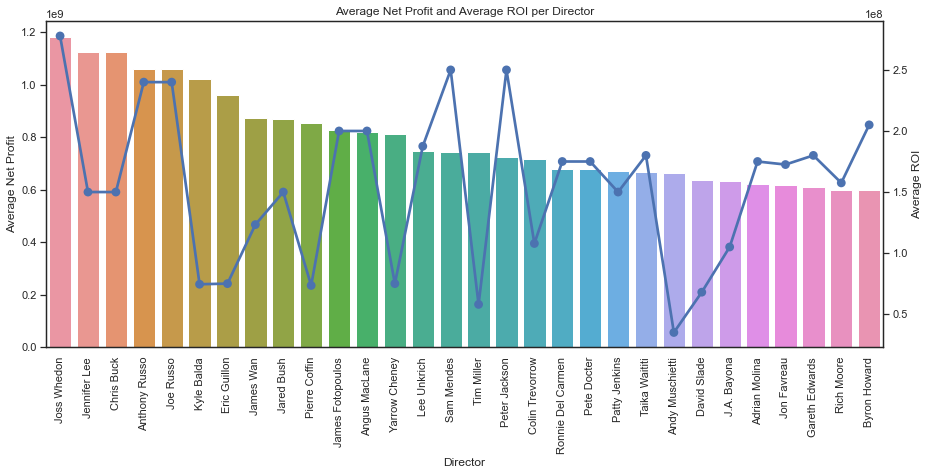

In [118]:
#Set figure size
sns.set(style="white")
plt.figure(figsize=(15, 6))

# Plot for net_profit on the left y-axis
ax1 = sns.barplot(x=top_directors['director'], y=top_directors['net_profit'])

# Plot for ROI on the right y-axis
ax2 = ax1.twinx()
sns.pointplot(x=top_directors['director'], y=top_directors['production_budget'], label='Average ROI', ax=ax2)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_xlabel("Director")
ax1.set_ylabel("Average Net Profit")
ax2.set_ylabel("Average ROI")
plt.title("Average Net Profit and Average ROI per Director");


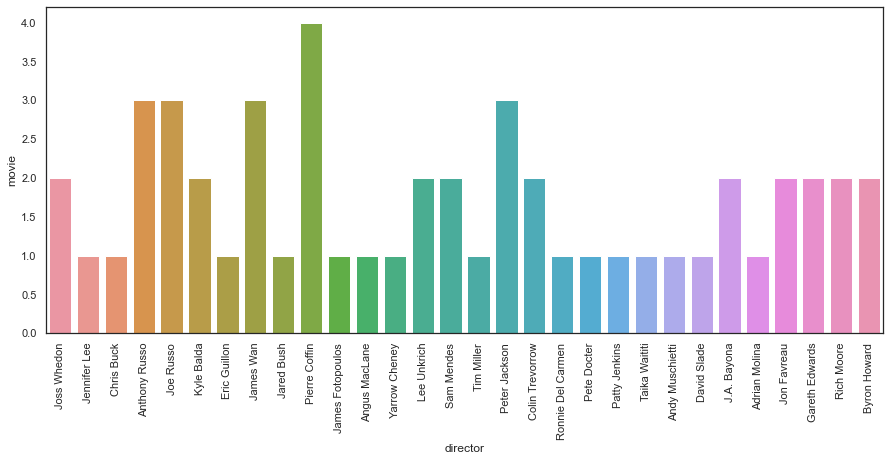

In [120]:
#Set figure size
sns.set(style="white")
plt.figure(figsize=(15, 6))

# Plot for net_profit on the left y-axis
axl = sns.barplot(x=top_directors['director'], y=top_directors['movie'])
axl.set_xticklabels(ax1.get_xticklabels(), rotation=90);

## 4.3 Which directors can deliver award winning films?

Get full list of award winning films, make m_id, group by m_id, count award numbers
Merge with IMDB to find director names, make sure director is alive
Find directors that worked in the most awarded film, or who has worked in the most amount of films with at least one award

## Recommendations

After this preliminary review, we recommend that Microsoft invests in the following strategies:



However, much research is still to be done. The biggest recommendation is to continue this research and explore the following: 